In [1]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib as mpl
 
mpl.rc('font', family='NanumBarunGothic')

In [3]:
df = pd.read_csv("../data/BC_Card_edit.csv")
print(df.info())
df.head()
# 결측값 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519297 entries, 0 to 519296
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   기준년월        519297 non-null  int64 
 1   품목대분류코드     519297 non-null  int64 
 2   품목대분류명      519297 non-null  object
 3   품목중분류코드     519297 non-null  int64 
 4   품목중분류명      519297 non-null  object
 5   성별          519297 non-null  object
 6   연령          519297 non-null  object
 7   가구생애주기      519297 non-null  object
 8   고객소재지_광역시도  519297 non-null  object
 9   고객소재지_시군구   519297 non-null  object
 10  고객소재지_읍면동   519297 non-null  object
 11  매출금액        519297 non-null  int64 
 12  매출건수        519297 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 51.5+ MB
None


,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
0,201903,10,의류,1010,여성의류,여성,40대,초중고자녀가구,서울특별시,구로구,궁동,782521,13
1,201903,21,e상품/서비스,2110,o2o서비스,여성,20대,신혼영유아가구,서울특별시,구로구,궁동,963789,29
2,201903,19,출산/육아,1913,육아용품서비스,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,924309,46
3,201903,21,e상품/서비스,2111,e머니/상품권,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1089360,54
4,201903,17,생활,1710,생활용품,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1656740,58


In [4]:
df['기준년월'].value_counts()

202003    135706
202103    128725
201909    109747
202009     76858
201903     68261
Name: 기준년월, dtype: int64

In [5]:
print(df[df['고객소재지_광역시도'] != '서울특별시'].shape[0])
print(df[df['고객소재지_광역시도'] == '서울특별시'].shape[0])
df = df[df['고객소재지_광역시도'] == '서울특별시']
df_1903 = df[df['기준년월'] == 201903]

213175
306122


In [6]:
df_1903.head(10)

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
0,201903,10,의류,1010,여성의류,여성,40대,초중고자녀가구,서울특별시,구로구,궁동,782521,13
1,201903,21,e상품/서비스,2110,o2o서비스,여성,20대,신혼영유아가구,서울특별시,구로구,궁동,963789,29
2,201903,19,출산/육아,1913,육아용품서비스,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,924309,46
3,201903,21,e상품/서비스,2111,e머니/상품권,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1089360,54
4,201903,17,생활,1710,생활용품,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1656740,58
5,201903,12,뷰티,1210,스킨케어,남성,50대,성인자녀가구,서울특별시,강동구,길동,874323,8
6,201903,12,뷰티,1212,바디케어,남성,40대,초중고자녀가구,서울특별시,강동구,길동,444666,13
7,201903,10,의류,1010,여성의류,여성,40대,신혼영유아가구,서울특별시,강동구,길동,1048087,17
8,201903,15,전자,1510,가전,여성,20대,1인가구,서울특별시,강동구,길동,2429276,17
9,201903,18,건강,1810,건강식품,남성,40대,초중고자녀가구,서울특별시,강동구,길동,529505,17


In [43]:
df_1903_test = df_1903
df_1903_test['1회금액'] = round(df_1903_test['매출금액']/df_1903_test['매출건수'],)
df_1903_test

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수,1회금액
0,201903,10,의류,1010,여성의류,여성,40대,초중고자녀가구,서울특별시,구로구,궁동,782521,13,60194.0
1,201903,21,e상품/서비스,2110,o2o서비스,여성,20대,신혼영유아가구,서울특별시,구로구,궁동,963789,29,33234.0
2,201903,19,출산/육아,1913,육아용품서비스,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,924309,46,20094.0
3,201903,21,e상품/서비스,2111,e머니/상품권,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1089360,54,20173.0
4,201903,17,생활,1710,생활용품,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1656740,58,28564.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68882,201903,10,의류,1014,스포츠의류,여성,30대,신혼영유아가구,서울특별시,영등포구,영등포동7가,1260455,13,96958.0
68883,201903,19,출산/육아,1912,임산부용품서비스,여성,30대,신혼영유아가구,서울특별시,영등포구,영등포동7가,2894378,29,99806.0
68884,201903,21,e상품/서비스,2110,o2o서비스,여성,30대,신혼영유아가구,서울특별시,영등포구,영등포동7가,13276210,342,38819.0
68886,201903,20,여가/스포츠,2013,여행,여성,30대,신혼영유아가구,서울특별시,영등포구,영등포동8가,223538,17,13149.0


In [7]:
sigoongu = list(set(df_1903['고객소재지_시군구']))
print(len(sigoongu))

25


In [8]:
big_category = list(set(df_1903['품목대분류명']))
print(len(big_category))

middle_category = list(set(df_1903['품목중분류명']))
print(len(middle_category))

13
49


In [9]:
lifestyle = list(set(df_1903['가구생애주기']))
print(len(lifestyle))
lifestyle

5


['1인가구', '초중고자녀가구', '노인가구', '신혼영유아가구', '성인자녀가구']

지역별 매출
송파구     3048
강남구     2820
강서구     2169
마포구     2165
강동구     2130
은평구     2112
영등포구    1977
성북구     1874
서초구     1775
구로구     1754
동작구     1650
서대문구    1622
노원구     1604
동대문구    1583
성동구     1506
중랑구     1500
광진구     1498
양천구     1224
관악구     1178
도봉구     1057
용산구     1014
강북구      967
금천구      834
종로구      533
중구       517
Name: 고객소재지_시군구, dtype: int64


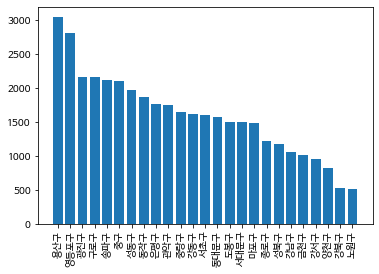

In [10]:
print('지역별 매출')
print(df_1903['고객소재지_시군구'].value_counts())
df_1903_total = df_1903['고객소재지_시군구'].value_counts().tolist()
# print(df_1903_total)

plt.bar(sigoongu, df_1903_total)
plt.xticks(rotation = 90)
plt.show()

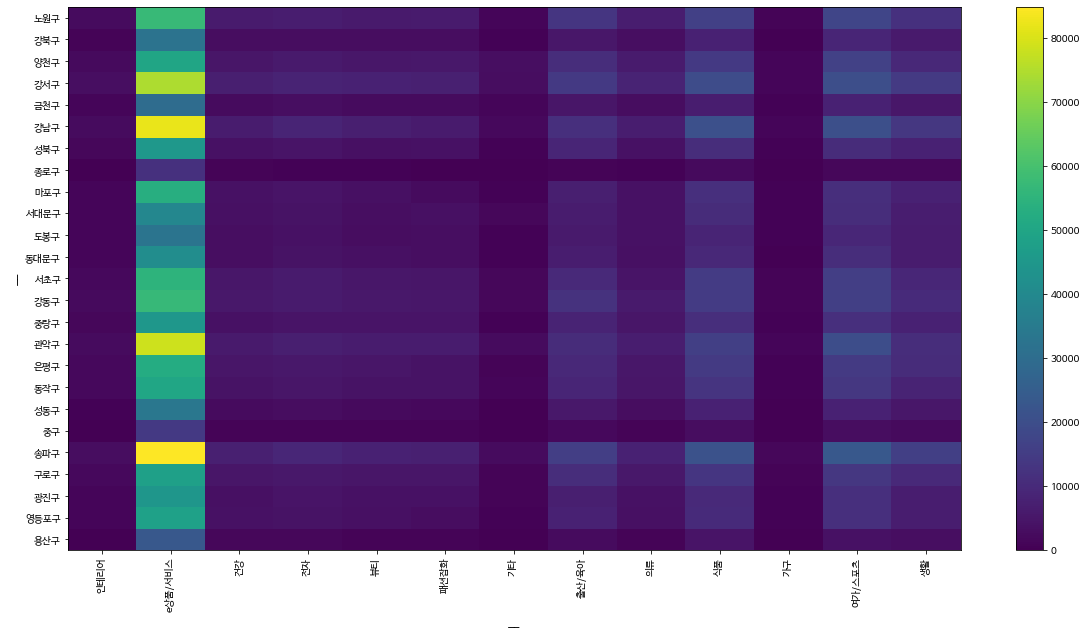

In [11]:
# 시군구 - 매출건수(품목대분류명)
pack = []
for gu in sigoongu:
    temp = df_1903[df_1903['고객소재지_시군구'] == gu]
    title = list(set(temp['품목대분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목대분류명']==t]

        count = temp_b['매출건수'].sum()
        title_count[t] = count
    pack.append(title_count)

sigoongu_moneycount_large = pd.DataFrame(pack, index=sigoongu)
sigoongu_moneycount_large = sigoongu_moneycount_large.fillna(0)
plt.figure(figsize=(20,10))
plt.pcolor(sigoongu_moneycount_large)
plt.xticks(np.arange(0.5, len(sigoongu_moneycount_large.columns), 1), sigoongu_moneycount_large.columns, rotation=90)
plt.yticks(np.arange(0.5, len(sigoongu_moneycount_large.index), 1), sigoongu_moneycount_large.index)
plt.xlabel('__', fontsize=14)
plt.ylabel('__', fontsize=14)
plt.colorbar()
plt.show()

In [12]:
#  시군구 - 매출건수(품목대분류명) - 순위 매기기
pack = []
for gu in sigoongu:
    temp = df_1903[df_1903['고객소재지_시군구'] == gu]
    title = list(set(temp['품목대분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목대분류명']==t]

        count = temp_b['매출건수'].sum()
        title_count[t] = count
    pack.append(title_count)

big_pack = pd.DataFrame(pack, index=sigoongu)
big_pack = big_pack.fillna(0)
big_pack.rank(ascending = False)

,인테리어,e상품/서비스,건강,전자,뷰티,패션잡화,기타,출산/육아,의류,식품,가구,여가/스포츠,생활
용산구,23.0,23.0,23.0,23.0,24.0,23.0,25.0,23.0,24.0,23.0,24.0,23.0,23.0
영등포구,17.0,12.0,13.0,16.0,15.0,19.0,18.0,14.0,19.0,16.0,16.0,12.0,15.0
광진구,14.0,16.0,16.0,14.0,13.0,13.0,13.0,16.0,13.0,17.0,14.0,14.0,16.0
구로구,8.0,13.0,10.0,10.0,10.0,8.0,14.0,7.0,8.0,10.0,9.0,10.0,8.0
송파구,2.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,2.0,1.0,1.0,1.0,1.0
중구,24.0,24.0,24.0,24.0,23.0,24.0,24.0,24.0,23.0,24.0,23.0,24.0,24.0
성동구,22.0,19.0,21.0,22.0,22.0,22.0,22.0,20.0,22.0,20.0,22.0,22.0,21.0
동작구,11.0,10.0,11.0,11.0,12.0,11.0,10.0,11.0,11.0,11.0,13.0,11.0,11.0
은평구,10.0,9.0,8.0,9.0,9.0,12.0,12.0,10.0,9.0,8.0,10.0,9.0,6.0
관악구,3.0,3.0,5.0,4.0,4.0,3.0,3.0,8.0,4.0,5.0,4.0,4.0,5.0


In [13]:
# 클러스터링 시도
# 시군구 - 매출건수(품목대분류명)

import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns

datapoints = sigoongu_moneycount_large.values
kmeans = KMeans(n_clusters=5).fit(datapoints)
print(kmeans.labels_)

[2 0 0 3 1 2 4 3 3 1 0 3 3 0 4 0 3 2 0 1 4 1 3 4 3]


In [32]:
sigoongu_moneycount_large['cluster_id'] = kmeans.labels_
temp = sigoongu_moneycount_large[sigoongu_moneycount_large['cluster_id']==3]
temp['cluster_id']

용산구    3
중구     3
종로구    3
금천구    3
강북구    3
Name: cluster_id, dtype: int32

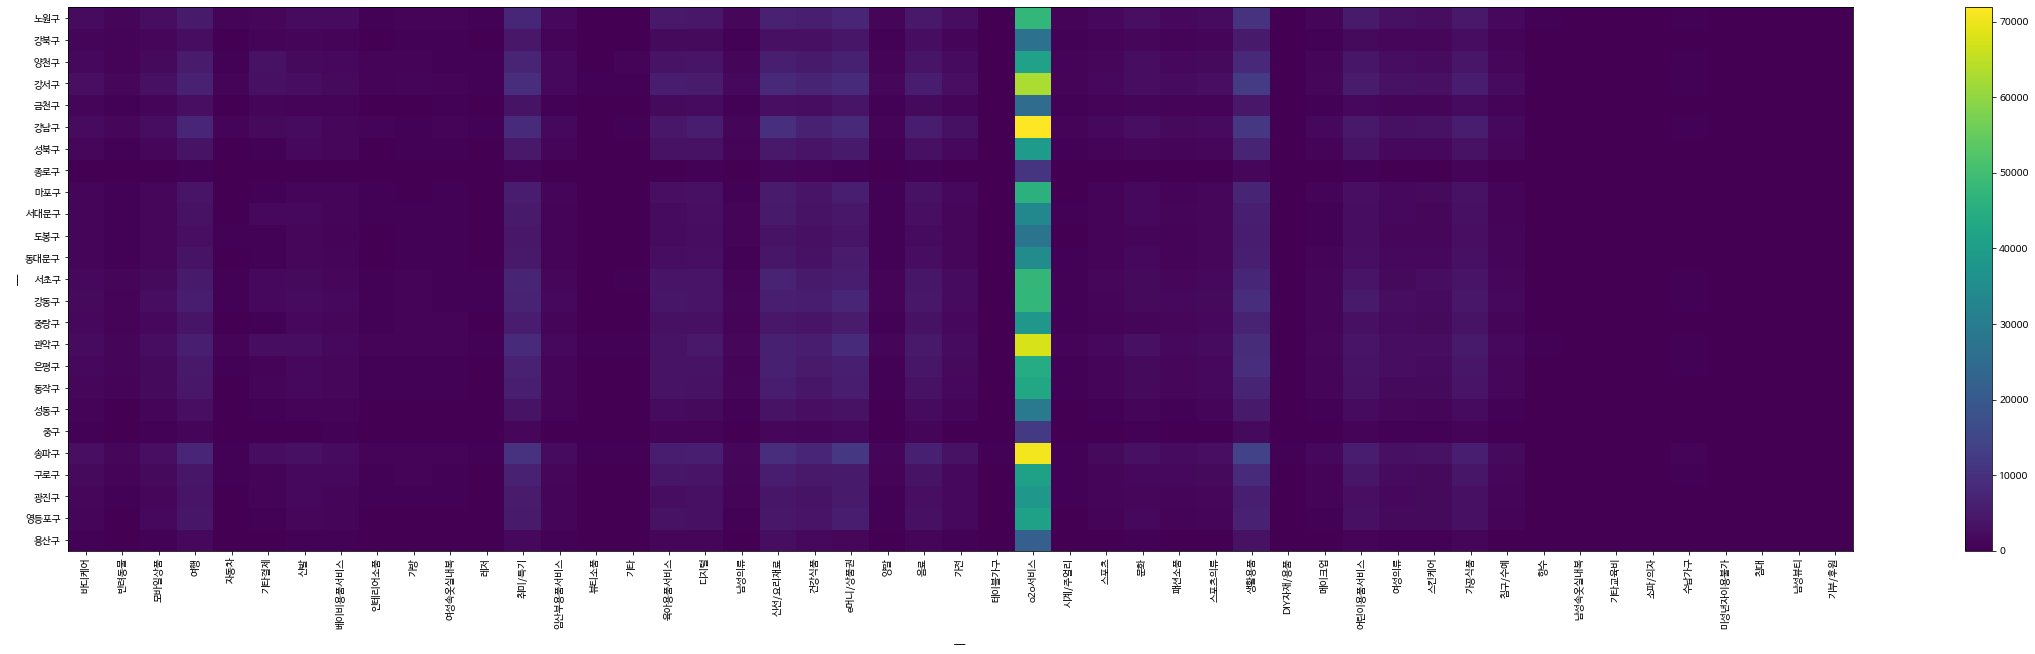

In [15]:
# 시군구 - 매출건수(품목중분류명)
pack = []
for gu in sigoongu:
    temp = df_1903[df_1903['고객소재지_시군구'] == gu]
    title = list(set(temp['품목중분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목중분류명']==t]

        count = temp_b['매출건수'].sum()
        title_count[t] = count
    pack.append(title_count)

sigoongu_moneycount_middle = pd.DataFrame(pack, index=sigoongu)
sigoongu_moneycount_middle = sigoongu_moneycount_middle.fillna(0)
plt.figure(figsize=(40,10))
plt.pcolor(sigoongu_moneycount_middle)
plt.xticks(np.arange(0.5, len(sigoongu_moneycount_middle.columns), 1), sigoongu_moneycount_middle.columns, rotation=90)
plt.yticks(np.arange(0.5, len(sigoongu_moneycount_middle.index), 1), sigoongu_moneycount_middle.index)
plt.xlabel('__', fontsize=14)
plt.ylabel('__', fontsize=14)
plt.colorbar()
plt.show()

In [16]:
#  시군구 - 매출건수(품목중분류명) - 순위 매기기
pack = []
for gu in sigoongu:
    temp = df_1903[df_1903['고객소재지_시군구'] == gu]
    title = list(set(temp['품목중분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목중분류명']==t]

        count = temp_b['매출건수'].sum()
        title_count[t] = count
    pack.append(title_count)

big_pack = pd.DataFrame(pack, index=sigoongu)
big_pack = big_pack.fillna(0)
big_pack.rank(ascending = False)

,바디케어,반려동물,모바일상품,여행,자동차,기타결제,신발,베이비용품서비스,인테리어소품,가방,...,침구/수예,향수,남성속옷실내복,기타교육비,소파/의자,수납가구,미성년자이용불가,침대,남성뷰티,기부/후원
용산구,24.0,24.0,23.0,23.0,24.0,25.0,23.0,24.0,24.0,25.0,...,23.0,24.0,23.0,17.5,22.0,24.5,19.0,19.5,20.0,14.0
영등포구,16.0,22.0,13.0,11.0,14.0,19.0,18.0,14.0,20.5,19.0,...,17.0,12.0,19.0,7.0,9.0,19.0,19.0,19.5,20.0,14.0
광진구,13.0,15.0,15.0,15.0,18.0,13.0,15.0,16.0,12.0,17.0,...,14.0,16.5,16.0,17.5,22.0,12.0,10.0,9.5,20.0,14.0
구로구,7.0,9.0,9.0,12.0,10.0,14.0,10.0,6.0,9.0,7.0,...,7.0,5.5,11.5,17.5,22.0,7.0,19.0,2.5,7.5,14.0
송파구,2.0,2.0,2.0,1.0,7.0,3.0,1.0,1.0,4.0,4.0,...,2.0,5.5,7.0,7.0,7.5,1.0,3.0,1.0,11.5,14.0
중구,23.0,23.0,24.0,24.0,23.0,24.0,24.0,23.0,22.0,23.0,...,24.0,24.0,23.0,17.5,22.0,23.0,19.0,19.5,20.0,14.0
성동구,22.0,21.0,22.0,20.0,22.0,22.0,22.0,21.0,23.0,22.0,...,22.0,22.0,23.0,17.5,14.0,18.0,19.0,9.5,11.5,2.0
동작구,12.0,11.0,11.0,10.0,15.0,10.0,11.0,9.0,10.0,11.0,...,12.0,9.0,8.0,4.0,6.0,14.0,12.0,19.5,4.5,14.0
은평구,10.0,7.0,10.0,9.0,9.0,12.0,12.0,8.0,11.0,12.0,...,9.0,13.0,10.0,17.5,14.0,10.0,7.5,13.0,7.5,14.0
관악구,3.0,4.0,4.0,4.0,3.0,4.0,3.0,5.0,2.0,3.0,...,5.0,1.0,1.0,1.0,4.0,3.0,2.0,2.5,1.0,1.0


In [17]:
# 클러스터링 시도
# 시군구 - 매출건수(품목중분류명)

import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns

datapoints = sigoongu_moneycount_middle.values
kmeans = KMeans(n_clusters=5).fit(datapoints)
print(kmeans.labels_)

[0 4 4 1 2 3 0 1 1 2 4 1 1 4 0 4 1 3 4 2 0 2 1 0 1]


In [18]:
sigoongu_moneycount_middle['cluster_id'] = kmeans.labels_
temp = sigoongu_moneycount_middle[sigoongu_moneycount_middle['cluster_id']==3]
temp['cluster_id']

중구     3
종로구    3
Name: cluster_id, dtype: int32

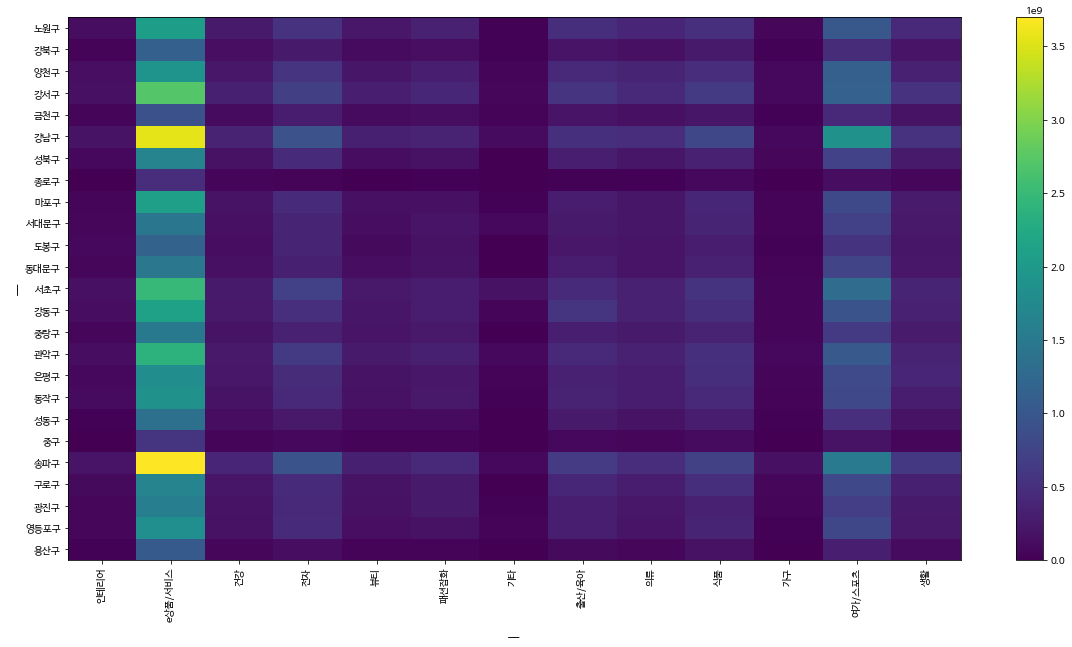

In [19]:
# 시군구 - 매출금액(품목대분류명)
pack = []
for gu in sigoongu:
    temp = df_1903[df_1903['고객소재지_시군구'] == gu]
    title = list(set(temp['품목대분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목대분류명']==t]

        count = temp_b['매출금액'].sum()
        title_count[t] = count
    pack.append(title_count)

sigoongu_money_large = pd.DataFrame(pack, index=sigoongu)
sigoongu_money_large = sigoongu_money_large.fillna(0)
plt.figure(figsize=(20,10))
plt.pcolor(sigoongu_money_large)
plt.xticks(np.arange(0.5, len(sigoongu_money_large.columns), 1), sigoongu_money_large.columns, rotation=90)
plt.yticks(np.arange(0.5, len(sigoongu_money_large.index), 1), sigoongu_money_large.index)
plt.xlabel('__', fontsize=14)
plt.ylabel('__', fontsize=14)
plt.colorbar()
plt.show()

In [20]:
# 시군구 - 매출금액(품목대분류명) - 순위 매기기
pack = []
for gu in sigoongu:
    temp = df_1903[df_1903['고객소재지_시군구'] == gu]
    title = list(set(temp['품목대분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목대분류명']==t]

        count = temp_b['매출금액'].sum()
        title_count[t] = count
    pack.append(title_count)

big_pack = pd.DataFrame(pack, index=sigoongu)
big_pack = big_pack.fillna(0)
big_pack.rank(ascending= False)

,인테리어,e상품/서비스,건강,전자,뷰티,패션잡화,기타,출산/육아,의류,식품,가구,여가/스포츠,생활
용산구,23.0,22.0,23.0,23.0,23.0,24.0,25.0,23.0,23.0,23.0,24.0,23.0,23.0
영등포구,18.0,11.0,15.0,12.0,15.0,17.0,11.0,12.0,19.0,13.0,20.0,13.0,17.0
광진구,14.0,15.0,14.0,14.0,13.0,10.0,15.0,13.0,13.0,18.0,13.0,17.0,14.0
구로구,10.0,14.0,10.0,13.0,11.0,9.0,19.0,9.0,10.0,8.0,7.0,11.0,10.0
송파구,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,1.0
중구,24.0,24.0,25.0,24.0,24.0,23.0,21.0,24.0,24.0,24.0,23.0,24.0,24.0
성동구,22.0,19.0,21.0,22.0,21.0,22.0,23.0,18.0,20.0,19.0,19.0,20.0,21.0
동작구,9.0,10.0,11.0,15.0,12.0,11.0,13.0,10.0,11.0,11.0,14.0,12.0,11.0
은평구,12.0,12.0,9.0,9.0,10.0,13.0,10.0,11.0,9.0,9.0,12.0,9.0,5.0
관악구,8.0,5.0,6.0,5.0,4.0,5.0,5.0,8.0,7.0,5.0,3.0,6.0,7.0


In [21]:
# 클러스터링 시도
# 시군구 - 매출금액(품목대분류명)

import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns

datapoints = sigoongu_money_large.values
kmeans = KMeans(n_clusters=5).fit(datapoints)
print(kmeans.labels_)

[4 3 3 3 2 0 4 3 3 1 3 1 1 3 4 3 3 0 3 2 4 1 1 4 1]


In [37]:
sigoongu_money_large['cluster_id'] = kmeans.labels_
temp = sigoongu_money_large[sigoongu_money_large['cluster_id']==3]
temp['cluster_id']

용산구    3
중구     3
종로구    3
금천구    3
강북구    3
Name: cluster_id, dtype: int32

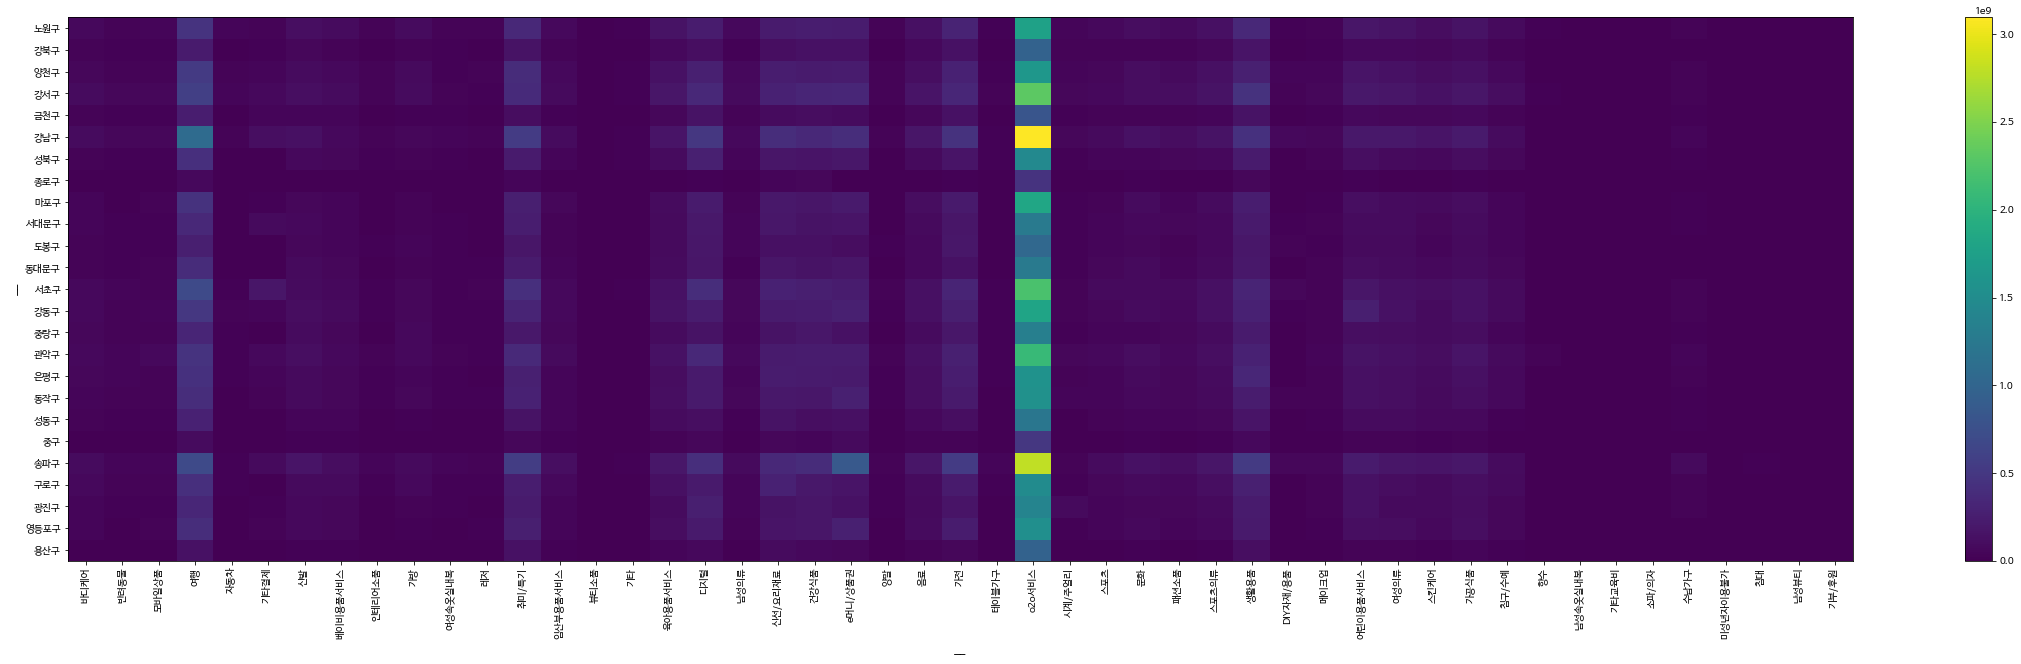

In [23]:
# 시군구 - 매출금액(품목중분류명)
pack = []
for gu in sigoongu:
    temp = df_1903[df_1903['고객소재지_시군구'] == gu]
    title = list(set(temp['품목중분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목중분류명']==t]

        count = temp_b['매출금액'].sum()
        title_count[t] = count
    pack.append(title_count)

sigoongu_money_middle = pd.DataFrame(pack, index=sigoongu)
sigoongu_money_middle = sigoongu_money_middle.fillna(0)
plt.figure(figsize=(40,10))
plt.pcolor(sigoongu_money_middle)
plt.xticks(np.arange(0.5, len(sigoongu_money_middle.columns), 1), sigoongu_money_middle, rotation=90)
plt.yticks(np.arange(0.5, len(sigoongu_money_middle.index), 1), sigoongu_money_middle.index)
plt.xlabel('__', fontsize=14)
plt.ylabel('__', fontsize=14)
plt.colorbar()
plt.show()

In [24]:
#  시군구 - 매출금액(품목중분류명) - 순위 매기기
pack = []
for gu in sigoongu:
    temp = df_1903[df_1903['고객소재지_시군구'] == gu]
    title = list(set(temp['품목중분류명']))
    title_count = {}
    for t in title:
        temp_b = temp[temp['품목중분류명']==t]

        count = temp_b['매출금액'].sum()
        title_count[t] = count
    pack.append(title_count)

big_pack = pd.DataFrame(pack, index=sigoongu)
big_pack = big_pack.fillna(0)
big_pack.rank(ascending = False)

,바디케어,반려동물,모바일상품,여행,자동차,기타결제,신발,베이비용품서비스,인테리어소품,가방,...,침구/수예,향수,남성속옷실내복,기타교육비,소파/의자,수납가구,미성년자이용불가,침대,남성뷰티,기부/후원
용산구,23.0,24.0,23.0,23.0,23.0,25.0,23.0,24.0,24.0,24.0,...,23.0,24.0,23.0,17.5,22.0,24.5,19.0,19.5,20.0,14.0
영등포구,15.0,23.0,14.0,13.0,14.0,11.0,14.0,12.0,19.0,20.0,...,15.0,16.0,20.0,3.0,13.0,19.0,19.0,19.5,20.0,14.0
광진구,12.0,15.0,16.0,17.0,19.0,15.0,17.0,16.0,15.0,15.0,...,12.0,17.0,17.0,17.5,22.0,10.0,3.0,4.0,20.0,14.0
구로구,8.0,11.0,13.0,11.0,9.0,19.0,10.0,5.0,8.0,6.0,...,7.0,5.0,13.0,17.5,22.0,5.0,19.0,5.0,9.0,14.0
송파구,2.0,3.0,4.0,2.0,8.0,3.0,1.0,1.0,1.0,4.0,...,2.0,10.0,7.0,5.0,4.0,1.0,4.0,1.0,13.0,14.0
중구,24.0,22.0,24.0,24.0,24.0,21.0,24.0,23.0,22.0,23.0,...,24.0,24.0,23.0,17.5,22.0,23.0,19.0,19.5,20.0,14.0
성동구,22.0,20.0,21.0,19.0,18.0,23.0,21.0,19.0,23.0,22.0,...,22.0,22.0,23.0,17.5,15.0,12.0,19.0,11.0,7.0,2.0
동작구,13.0,12.0,9.0,14.0,17.0,13.0,13.0,10.0,9.0,9.0,...,10.0,7.0,9.0,6.0,5.0,13.0,11.0,19.5,5.0,14.0
은평구,10.0,6.0,10.0,10.0,10.0,10.0,12.0,11.0,11.0,13.0,...,9.0,13.0,10.0,17.5,17.0,8.0,8.0,13.0,10.0,14.0
관악구,4.0,4.0,1.0,7.0,7.0,6.0,4.0,7.0,4.0,5.0,...,4.0,1.0,4.0,1.0,9.0,2.0,2.0,8.0,2.0,1.0


In [25]:
# 클러스터링 시도
# 시군구 - 매출금액(품목중분류명)

import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns

datapoints = sigoongu_money_middle.values
kmeans = KMeans(n_clusters=5).fit(datapoints)
print(kmeans.labels_)

[3 2 1 2 4 3 1 2 2 0 1 2 0 1 1 1 2 3 1 4 3 0 2 3 2]


In [26]:
sigoongu_money_middle['cluster_id'] = kmeans.labels_
temp = sigoongu_money_middle[sigoongu_money_middle['cluster_id']==3]
temp['cluster_id']

용산구    3
중구     3
종로구    3
금천구    3
강북구    3
Name: cluster_id, dtype: int32